 

# Project: Investigate a Dataset (No-show Appointments!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Purpose To perform a Data analysis on a sample Dataset of No-show Appointments

This Dataset contains the records of the patients with various types of diseases who booked appointments and did not showed up on their appointment Day.


In [8]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [13]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.shape

(110527, 14)

There are 110527 records and 14 columns in the dataset.


### Data Cleaning ()
From the data description and questions to answer, I've determined that some of the dataset columns are not necessary for the analysis process and will therefore be removed. This will help to process the Data Analysis Faster
i'll take a 3 step approach to data cleanup

1-Identify and remove duplicate entries
2-Remove unnecessary columns
3-Fix missing and data format issues

Step 1 - Removing Duplicate entries Concluded that no duplicates entries exists, based on the tests below

In [15]:
# Identify and remove duplicate entries

print ("Number of duplicate row ",df.duplicated().sum())


Number of duplicate row  0


There is no duplicate row 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are 13 independent variables and one dependent (no_show) in the dataset.
The dataset does not contain any missing values (NaNs).
The patient_id data type is float but should be int.

In [17]:
# Convert patient_id from float to int
df['PatientId'] = df['PatientId'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [18]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


age: The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55. There is a data range problem in the dataset. The age value cannot be below 0, and there are some very old people as well. To be investigated.
handicap: is represented by 4 classes as opposed to other categorical variables in this dataset. This can be a result of an error or there are 4 categories used. Both options are potentially valid and this should be confirmed by an SME.
sms_received: 75% of patients received sms regarding an appointment.

max age is 115 
min ade is -1
fix the min age 

In [21]:
df=df[df.Age>=0]


In [22]:
df.rename(columns = {'No-show':'Noshow',}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)




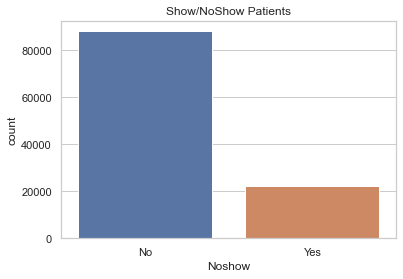

In [23]:

ax = sns.countplot(x=df.Noshow, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

we can see that out of 110519 patients around 88,000 of them have turned up and that's around 80%

### Research Question 2  (Does age affect)

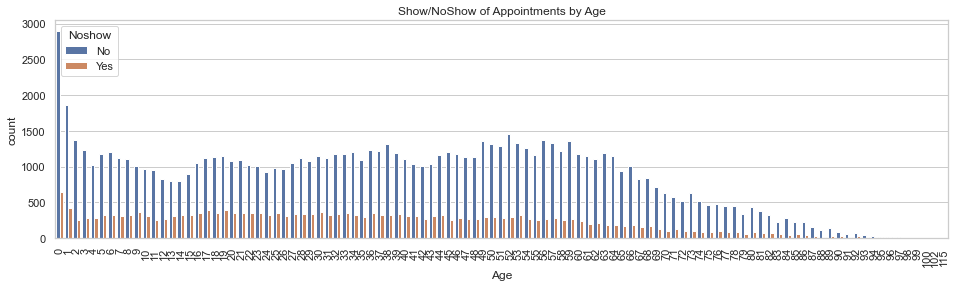

In [27]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age, hue=df.Noshow)
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()


the ratio of Show to NoShow is nearly the same for all ages except for "Age 0" and "Age 1"
We will get better clarity on the ratio of Show to NoShow for all ages. so age does not affect the commitment to visit

Question 3 Can gender affect visit ?

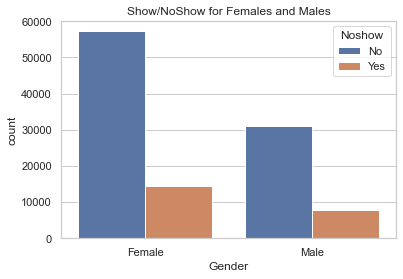

In [28]:
ax = sns.countplot(x=df.Gender, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

We can see that of the 88,000 patients that appeared, about 57,000 were female and 31,000 were male. Of the 22,500 patients who did not come for a visit, about 15,000 were females and 7,500 were males The ratio of females to males who attended appears to be the same as that which did not come to visit, and therefore gender affect

Question 4 what about the neighborhood ?

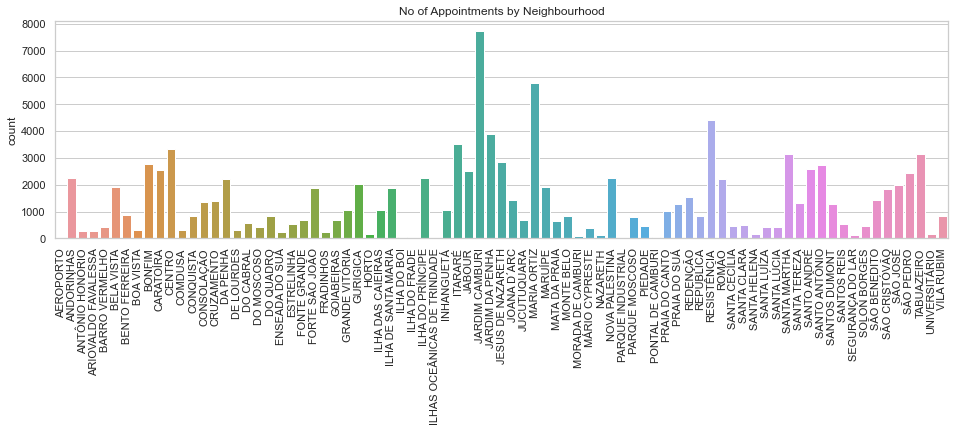

In [29]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

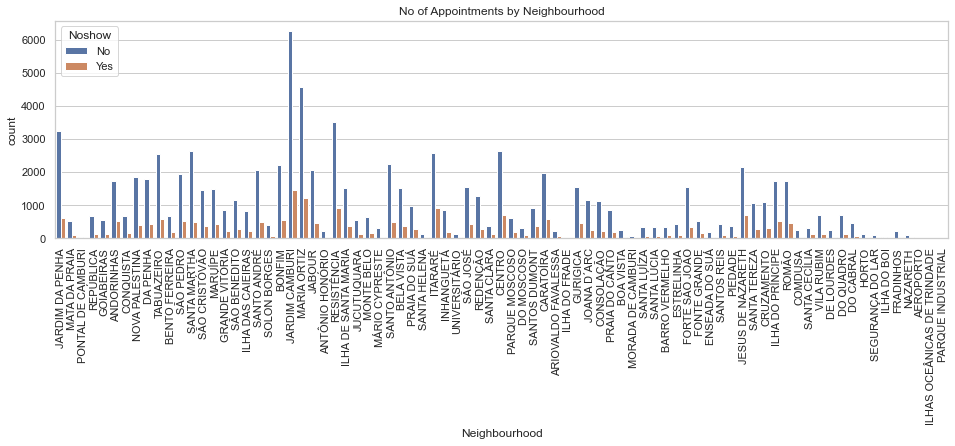

In [33]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x = df.Neighbourhood , hue=df.Noshow )
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

 we can see that the number of patients for few Neighbourhood's is very high.

Question 5 what about the SMSReceived ?

In [36]:
df['SMS_received'].value_counts()


0    75044
1    35482
Name: SMS_received, dtype: int64

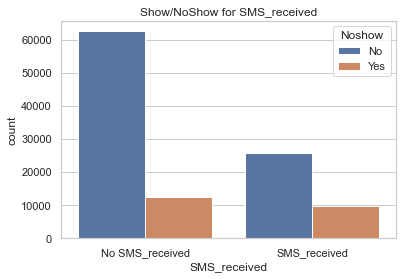

In [34]:
ax = sns.countplot(x=df.SMS_received, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for SMS_received")
x_ticks_labels=['No SMS_received', 'SMS_received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

 we can see that there are about 75,000 patients who did not receive text messages, and about 84% of them attended the visit. Of the 35,500 patients who received text messages, about 72% attended the visit

Question 6 what about the Hypertension ?



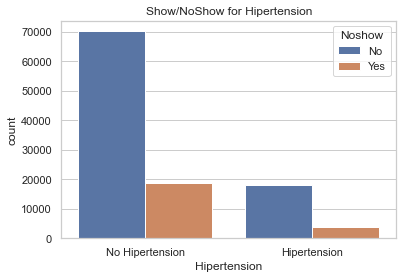

In [37]:
ax = sns.countplot(x=df.Hipertension, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for Hipertension")
x_ticks_labels=['No Hipertension', 'Hipertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

we can see that there are about 88,000 patients suffering from high blood pressure and about 78% of them attended the visit. Of 22,500 patients with high blood pressure, about 85% came to visit. Therefore, the high blood pressure feature can help us determine whether a patient will show up on a post-appointment visit.

Question 7 what about the Alcoholism ?

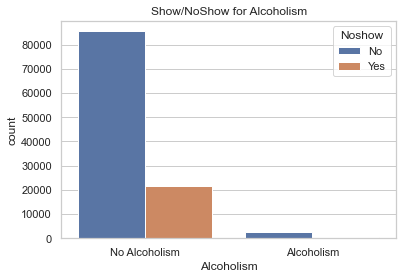

In [38]:
ax = sns.countplot(x=df.Alcoholism, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

we can see that there are about 105,000 patients who do not suffer from alcoholism and about 80% of them attended the visit. Of the 5,500 patients with alcohol addiction, about 80% attended the visit. Since the rate of visits for non-alcoholic patients is the same, this may not help us determine whether or not the patient is coming for a visit.

Question 8 what about the Diabetes ?

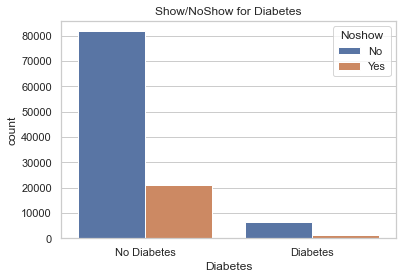

In [39]:
ax = sns.countplot(x=df.Diabetes, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()


we can see that there are about 102,000 diabetics and about 80% of them attended the visit. Of the 8,500 diabetic patients, about 83% came to visit. Therefore, the diabetes feature can help us determine whether a patient will attend the post-appointment visit.

Question 9 what about Handcap ?

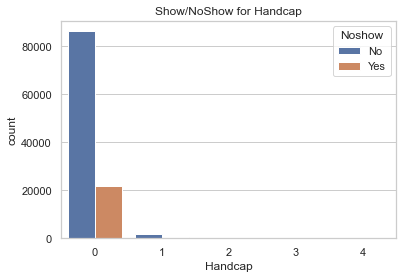

In [40]:
ax = sns.countplot(x=df.Handcap, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for Handcap")
plt.show()

we can see that there are about 110,000 unobstructed patients and about 80% of them have come for a visit. Since we see a clear distinction between different levels of disability, this feature will help us determine if a patient will come for a visit after making an appointment.

<a id='conclusions'></a>
## Conclusions
By appling everything we had learned in the class and used most of the functions explained By analyzing and tracking the results

1-The Age values included a negative value which created problem in Analysing the Dataset so the negative value was changed into positive value
Age did not seem to be a major factor

2-Gender is importent factor 

3-Neighborhood and high blood pressure come after gender as there are some neighborhoods where diseases are common and high blood pressure patients tend to appear if they have it or not

4- receive sms does not effect to attend 

5- one Patient can have more than one appointment